In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [194]:
np.random.seed(42)

In [229]:
df = pd.read_csv('hand.csv')

In [196]:
df.head()

,group,sex,right_b,right_a,left_b,left_a
0,ТПП-20,д,29.5,31.5,28.5,30.5
1,ТПП-21,д,35.5,31.5,23.5,29.5
2,ТПП-22,д,32.5,32.5,33.5,33.5
3,ТПП-23,д,28.5,29.5,27.5,27.0
4,ТПП-24,д,23.5,23.5,21.0,21.0


In [197]:
df.describe()

,right_b,right_a,left_b,left_a
count,113.000000,72.000000,113.000000,72.000000
mean,32.000000,34.770833,29.930088,32.463889
std,12.711251,13.494636,12.066726,12.982765
min,12.500000,10.000000,11.000000,9.000000
25%,23.000000,24.000000,21.000000,22.000000
50%,28.500000,31.500000,26.000000,29.750000
75%,38.500000,43.875000,38.500000,41.125000
max,76.000000,76.000000,70.000000,70.000000


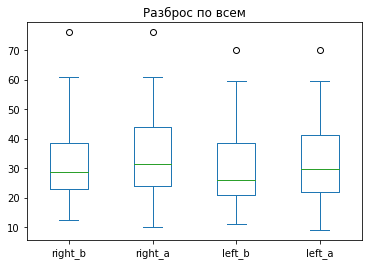

In [198]:
df.plot.box(title="Разброс по всем");

In [199]:
df_g = df[df["sex"]=="д"]
df_b = df[df["sex"]=="м"]

df_grb = df_g["right_b"].dropna() # девочки правая до
df_gra = df_g["right_a"].dropna() # девочки правая после
df_glb = df_g["left_b"].dropna()  # девочки левая до
df_gla = df_g["left_a"].dropna()  # девочки левая после

df_brb = df_b["right_b"].dropna() # мальчики правая до
df_bra = df_b["right_a"].dropna() # мальчики правая после
df_blb = df_b["left_b"].dropna()  # мальчики левая до
df_bla = df_b["left_a"].dropna()  # мальчики левая после

In [200]:
for ds in [
    df_grb,
    df_gra,
    df_glb,
    df_gla,

    df_brb,
    df_bra,
    df_blb,
    df_bla,
]:
    print(ds.describe())

count    68.000000
mean     24.250000
std       5.785017
min      12.500000
25%      20.500000
50%      24.000000
75%      28.500000
max      36.000000
Name: right_b, dtype: float64
count    37.000000
mean     24.648649
std       5.729874
min      10.000000
25%      21.000000
50%      25.000000
75%      28.000000
max      36.000000
Name: right_a, dtype: float64
count    68.000000
mean     22.397059
std       5.042771
min      11.000000
25%      19.375000
50%      21.750000
75%      25.625000
max      34.500000
Name: left_b, dtype: float64
count    37.000000
mean     23.013514
std       5.535851
min       9.000000
25%      20.000000
50%      23.000000
75%      27.000000
max      33.500000
Name: left_a, dtype: float64
count    45.000000
mean     43.711111
std      11.279753
min      25.500000
25%      35.500000
50%      44.500000
75%      51.500000
max      76.000000
Name: right_b, dtype: float64
count    35.000000
mean     45.471429
std      10.777115
min      22.000000
25%      39.5000

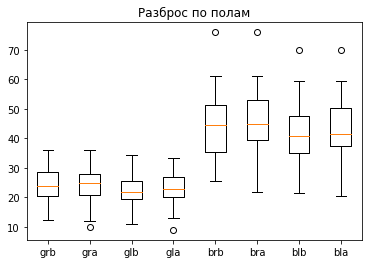

In [201]:
fig, ax = plt.subplots()
ax.set_title("Разброс по полам")
ax.boxplot([
    df_grb,
    df_gra,
    df_glb,
    df_gla,

    df_brb,
    df_bra,
    df_blb,
    df_bla,
],
    labels=["grb", "gra", "glb", "gla", "brb", "bra", "blb", "bla"]
)
plt.show()

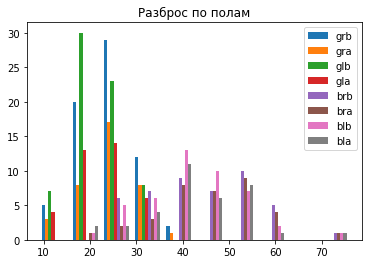

In [202]:
fig, ax = plt.subplots()
ax.set_title("Разброс по полам")
ax.hist([
    df_grb,
    df_gra,
    df_glb,
    df_gla,

    df_brb,
    df_bra,
    df_blb,
    df_bla,
],label=["grb", "gra", "glb", "gla", "brb", "bra", "blb", "bla"])
ax.legend(prop={'size': 10})
plt.show()

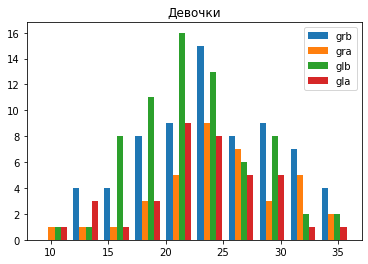

In [203]:
fig, ax = plt.subplots()
ax.set_title("Девочки")
ax.hist([
    df_grb,
    df_gra,
    df_glb,
    df_gla,
],label=["grb", "gra", "glb", "gla"])
ax.legend(prop={'size': 10})
plt.show()

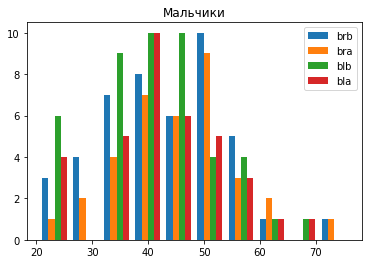

In [204]:
fig, ax = plt.subplots()
ax.set_title("Мальчики")
ax.hist([
    df_brb,
    df_bra,
    df_blb,
    df_bla,
],label=["brb", "bra", "blb", "bla"])
ax.legend(prop={'size': 10})
plt.show()

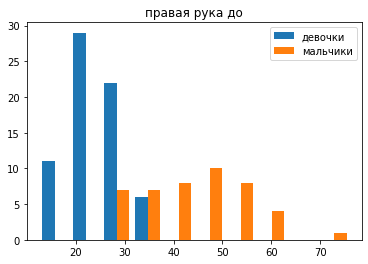

In [205]:
fig, ax = plt.subplots()
ax.set_title("правая рука до")
ax.hist([
    df_grb,
    df_brb,
],label=["девочки", "мальчики"])
ax.legend(prop={'size': 10})
plt.show()

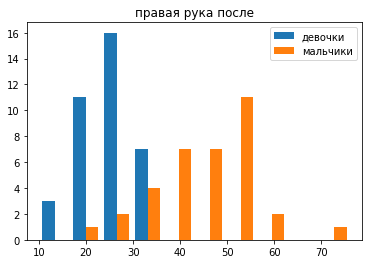

In [206]:
fig, ax = plt.subplots()
ax.set_title("правая рука после")
ax.hist([
    df_gra,
    df_bra,
],label=["девочки", "мальчики"])
ax.legend(prop={'size': 10})
plt.show()

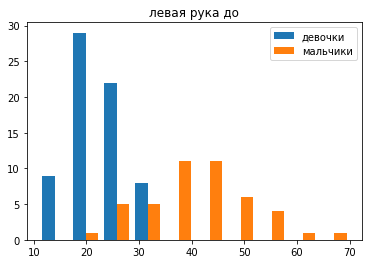

In [207]:
fig, ax = plt.subplots()
ax.set_title("левая рука до")
ax.hist([
    df_glb,
    df_blb,
],label=["девочки", "мальчики"])
ax.legend(prop={'size': 10})
plt.show()

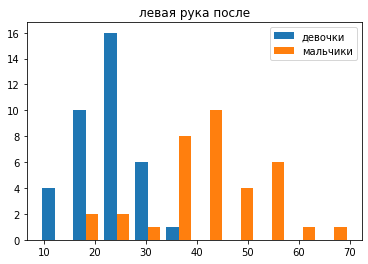

In [208]:
fig, ax = plt.subplots()
ax.set_title("левая рука после")
ax.hist([
    df_gla,
    df_bla,
],label=["девочки", "мальчики"])
ax.legend(prop={'size': 10})
plt.show()

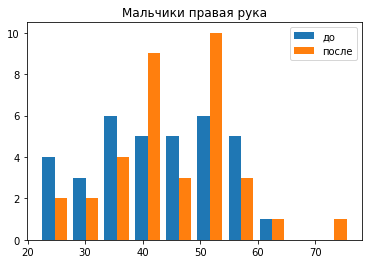

In [209]:
fig, ax = plt.subplots()
ax.set_title("Мальчики правая рука")
ax.hist([
    df_brb.sample(35),
    df_bra,
],label=["до", "после"])
ax.legend(prop={'size': 10})
plt.show()

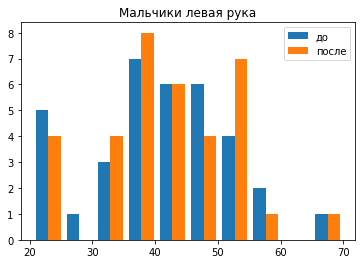

In [210]:
fig, ax = plt.subplots()
ax.set_title("Мальчики левая рука")
ax.hist([
    df_blb.sample(35),
    df_bla,
],label=["до", "после"])
ax.legend(prop={'size': 10})
plt.show()

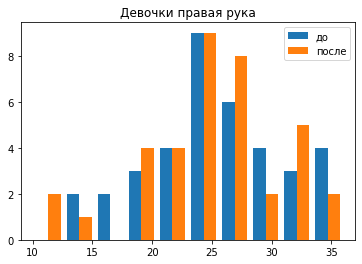

In [211]:
fig, ax = plt.subplots()
ax.set_title("Девочки правая рука")
ax.hist([
    df_grb.sample(37),
    df_gra,
],label=["до", "после"])
ax.legend(prop={'size': 10})
plt.show()

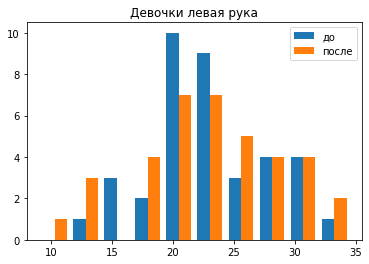

In [212]:
fig, ax = plt.subplots()
ax.set_title("Девочки левая рука")
ax.hist([
    df_glb.sample(37),
    df_gla,
],label=["до", "после"])
ax.legend(prop={'size': 10})
plt.show()

In [213]:
def draw_norm(df):
    mu, sigma = norm.fit(df)
    count, bins, ignored = plt.hist(df, density=False)
    density = len(df)*np.diff(bins)[0]
    plt.plot(bins,norm.pdf(bins, loc = mu, scale = sigma)*density)
    plt.title(f"Fit Values: {mu:.2f} and {sigma:.2f}")
    plt.show()

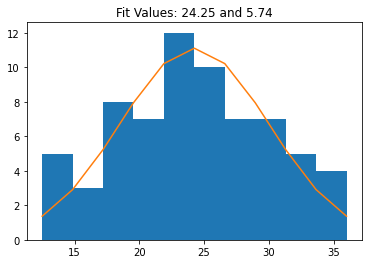

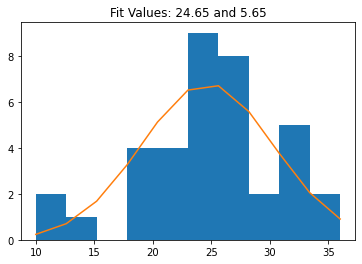

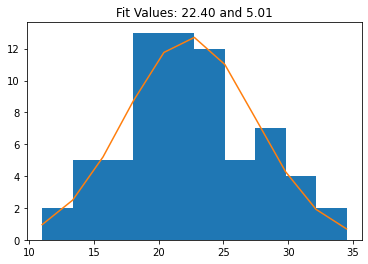

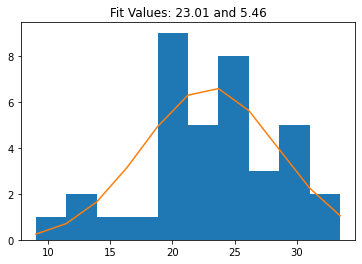

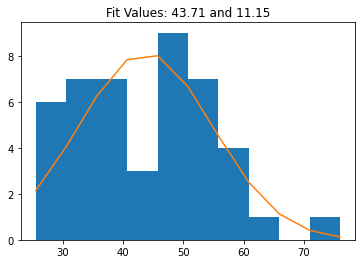

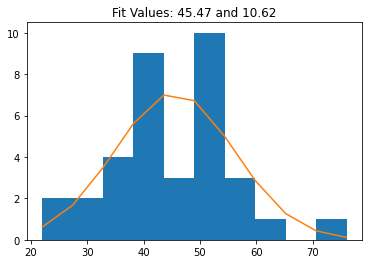

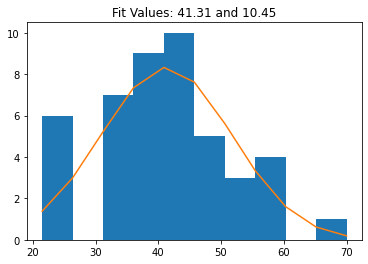

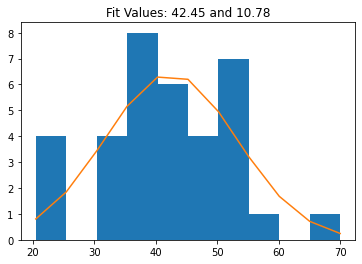

In [214]:
for ds in (
    df_grb,
    df_gra,
    df_glb,
    df_gla,

    df_brb,
    df_bra,
    df_blb,
    df_bla,):
    draw_norm(ds)

In [215]:
# Тест на нормальное распределение
from scipy.stats import kstest, norm

for ds in (
    df_grb,
    df_gra,
    df_glb,
    df_gla,

    df_brb,
    df_bra,
    df_blb,
    df_bla,):
    mu, sigma = norm.fit(ds)
    ks_statistic, p_value = kstest(ds.values, "norm", args=(mu, sigma))
    print(ks_statistic, p_value)

0.05252926537456204 0.9870061140773716
0.0879616782765113 0.9130419196267813
0.0952107244735087 0.5369367552712585
0.09603326459585715 0.8523661883706067
0.08761113754245087 0.8503229759396584
0.07507957881156446 0.9806274990760719
0.0619225146095404 0.9910278956027987
0.08256767718293878 0.9549075271105575


In [216]:
# Сравнение руки до и после
from scipy.stats import ks_2samp
print(ks_2samp(df_grb, df_gra))
print(ks_2samp(df_glb, df_gla))
print(ks_2samp(df_brb, df_bra))
print(ks_2samp(df_blb, df_bla))

KstestResult(statistic=0.09976152623211447, pvalue=0.9446767394792371)
KstestResult(statistic=0.12678855325914148, pvalue=0.7767579840854041)
KstestResult(statistic=0.1492063492063492, pvalue=0.7125204776926608)
KstestResult(statistic=0.09523809523809523, pvalue=0.9839940433054091)


In [217]:
#  Сравнение мальчиков и девочек
from scipy.stats import ks_2samp
print(ks_2samp(df_grb, df_brb))
print(ks_2samp(df_glb, df_blb))
print(ks_2samp(df_gra, df_bra))
print(ks_2samp(df_gla, df_bla))

KstestResult(statistic=0.7562091503267974, pvalue=1.6653345369377348e-15)
KstestResult(statistic=0.8372549019607843, pvalue=3.3306690738754696e-16)
KstestResult(statistic=0.8586872586872587, pvalue=6.272760089132134e-14)
KstestResult(statistic=0.8316602316602316, pvalue=6.260547635861258e-13)


In [237]:
# Левши
left = df[df["right_b"] < df["left_b"]]
left.describe()

,right_b,right_a,left_b,left_a
count,25.000000,14.000000,25.000000,14.000000
mean,25.100000,32.642857,28.800000,34.128571
std,9.376389,11.578210,10.326947,11.854920
min,12.500000,19.000000,14.500000,14.000000
25%,19.000000,24.125000,21.000000,26.250000
50%,23.000000,28.750000,27.000000,32.000000
75%,31.500000,40.625000,33.500000,40.000000
max,50.000000,53.500000,51.000000,55.000000


In [238]:
df_g = left[left["sex"]=="д"]
df_b = left[left["sex"]=="м"]

df_grb = df_g["right_b"].dropna() # девочки правая до
df_gra = df_g["right_a"].dropna() # девочки правая после
df_glb = df_g["left_b"].dropna()  # девочки левая до
df_gla = df_g["left_a"].dropna()  # девочки левая после

df_brb = df_b["right_b"].dropna() # мальчики правая до
df_bra = df_b["right_a"].dropna() # мальчики правая после
df_blb = df_b["left_b"].dropna()  # мальчики левая до
df_bla = df_b["left_a"].dropna()  # мальчики левая после

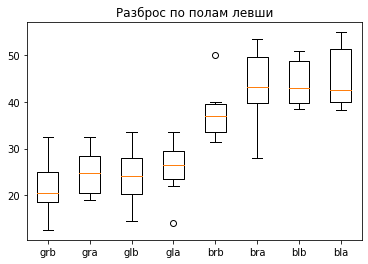

In [239]:
fig, ax = plt.subplots()
ax.set_title("Разброс по полам левши")
ax.boxplot([
    df_grb,
    df_gra,
    df_glb,
    df_gla,

    df_brb,
    df_bra,
    df_blb,
    df_bla,
],
    labels=["grb", "gra", "glb", "gla", "brb", "bra", "blb", "bla"]
)
plt.show()

In [240]:
# Правши
right = df[df["right_b"] > df["left_b"]]
right.describe()

,right_b,right_a,left_b,left_a
count,80.000000,53.000000,80.000000,53.000000
mean,34.850000,36.386792,30.770000,32.709434
std,12.987677,13.739206,12.845099,13.397463
min,14.000000,12.000000,11.000000,9.000000
25%,25.000000,25.000000,21.000000,22.000000
50%,30.750000,32.500000,25.250000,29.500000
75%,46.500000,47.500000,40.000000,42.000000
max,76.000000,76.000000,70.000000,70.000000


In [241]:
df_g = right[right["sex"]=="д"]
df_b = right[right["sex"]=="м"]

df_grb = df_g["right_b"].dropna() # девочки правая до
df_gra = df_g["right_a"].dropna() # девочки правая после
df_glb = df_g["left_b"].dropna()  # девочки левая до
df_gla = df_g["left_a"].dropna()  # девочки левая после

df_brb = df_b["right_b"].dropna() # мальчики правая до
df_bra = df_b["right_a"].dropna() # мальчики правая после
df_blb = df_b["left_b"].dropna()  # мальчики левая до
df_bla = df_b["left_a"].dropna()  # мальчики левая после

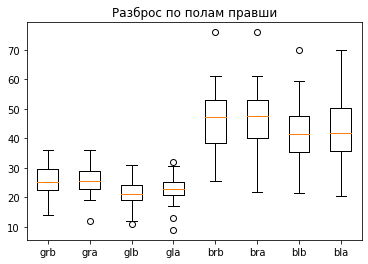

In [242]:
fig, ax = plt.subplots()
ax.set_title("Разброс по полам правши")
ax.boxplot([
    df_grb,
    df_gra,
    df_glb,
    df_gla,

    df_brb,
    df_bra,
    df_blb,
    df_bla,
],
    labels=["grb", "gra", "glb", "gla", "brb", "bra", "blb", "bla"]
)
plt.show()